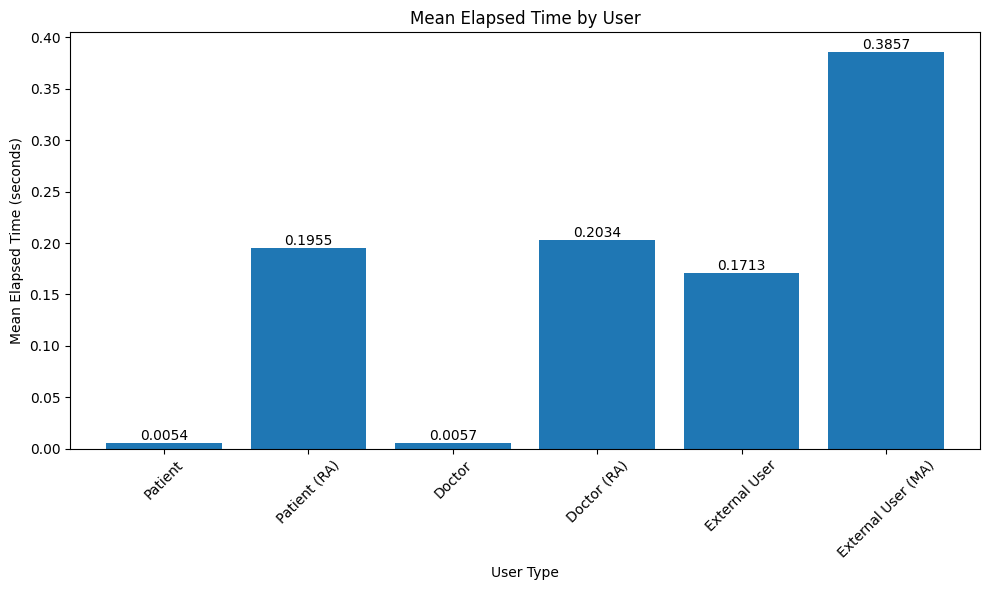

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

naive_file = '/home/ben/TM/src/tests/results_naive.csv'
simple_file = '/home/ben/TM/src/tests/simple_data_access/results.csv'
simple_subtimes_file = '/home/ben/TM/src/tests/simple_data_access/results_subtimes.csv'
extended_file = '/home/ben/TM/src/tests/extended_data_access_test/results.csv'
extended_subtimes_file = '/home/ben/TM/src/tests/extended_data_access_test/results_subtime.csv'

header = ["Timestamp", "User ID", "Client Result", "Elapsed Time (seconds)"]

naive_df = pd.read_csv(naive_file, names=header, header=None)
simple_df = pd.read_csv(simple_file)
simple_subtimes_df = pd.read_csv(simple_subtimes_file)
extended_df = pd.read_csv(extended_file)
extended_subtimes_df = pd.read_csv(extended_subtimes_file)

user_labels = {
    "000000000000000000000000": "Doctor",
    "111111111111111111111111": "Patient",
    "222222222222222222222222": "External User",
    "patient1": "Patient",
    "doctor1": "Doctor",
    "external1": "External User"
}

def append_user_label(df, user_labels, label_suffix):
    df['User Label'] = df['User ID'].map(lambda user_id: user_labels.get(user_id, "Unknown") + label_suffix)

append_user_label(naive_df, user_labels, "")
append_user_label(simple_df, user_labels, " (RA)")
append_user_label(simple_subtimes_df, user_labels, " (RA)")
append_user_label(extended_df, user_labels, " (MA)")
append_user_label(extended_subtimes_df, user_labels, " (MA)")

combined_df = pd.concat([naive_df, simple_df, extended_df])
mean_elapsed_time = combined_df.groupby('User Label')['Elapsed Time (seconds)'].mean()
ordered_labels = ['Patient', 'Patient (RA)', 'Doctor', 'Doctor (RA)', 'External User', 'External User (MA)']
mean_elapsed_time = mean_elapsed_time[ordered_labels]
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True
plt.figure(figsize=(10, 6))
mean_elapsed_time.plot(kind='bar', width=0.8)
for index, value in enumerate(mean_elapsed_time):
    plt.text(index, value, f'{value:.4f}', ha='center', va='bottom')
    
plt.title('Mean Elapsed Time by User')
plt.ylabel('Mean Elapsed Time (seconds)')
plt.xlabel('User Type')
plt.xticks(rotation=45)
plt.show()

<Figure size 1000x600 with 0 Axes>

/home/ben/TM/venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  fig.canvas.print_figure(bytes_io, **kw)


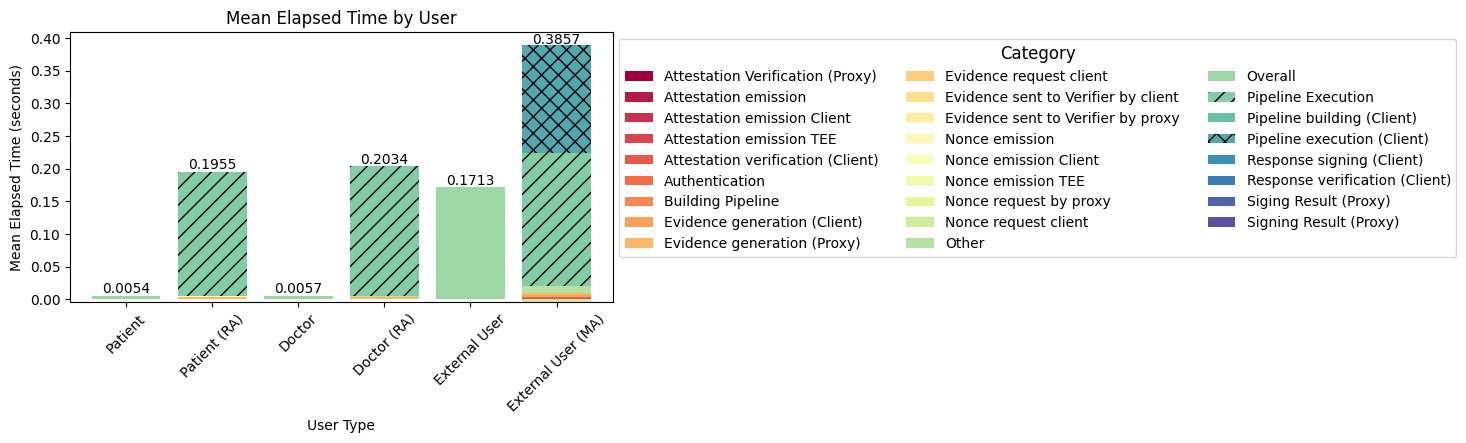

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

naive_file = '/home/ben/TM/src/tests/results_naive.csv'
simple_file = '/home/ben/TM/src/tests/simple_data_access/results.csv'
simple_subtimes_file = '/home/ben/TM/src/tests/simple_data_access/results_subtimes.csv'
extended_file = '/home/ben/TM/src/tests/extended_data_access_test/results.csv'
extended_subtimes_file = '/home/ben/TM/src/tests/extended_data_access_test/results_subtime.csv'

header = ["Timestamp", "User ID", "Client Result", "Elapsed Time (seconds)"]

naive_df = pd.read_csv(naive_file, names=header, header=None)
simple_df = pd.read_csv(simple_file)
simple_subtimes_df = pd.read_csv(simple_subtimes_file)
extended_df = pd.read_csv(extended_file)
extended_subtimes_df = pd.read_csv(extended_subtimes_file)

user_labels = {
    "000000000000000000000000": "Doctor",
    "111111111111111111111111": "Patient",
    "222222222222222222222222": "External User",
    "patient1": "Patient",
    "doctor1": "Doctor",
    "external1": "External User"
}

hatch_patterns = {
    "Pipeline Execution": "//",  # Diagonal lines
    "Pipeline execution (Client)": "xx",  # Cross-hatch pattern
}


def append_user_label(df, user_labels, label_suffix):
    df['User Label'] = df['User ID'].map(lambda user_id: user_labels.get(user_id, "Unknown") + label_suffix)

append_user_label(naive_df, user_labels, "")
append_user_label(simple_df, user_labels, " (RA)")
append_user_label(simple_subtimes_df, user_labels, " (RA)")
append_user_label(extended_df, user_labels, " (MA)")
append_user_label(extended_subtimes_df, user_labels, " (MA)")

combined_df = pd.concat([naive_df, simple_df, extended_df])
mean_elapsed_time = combined_df.groupby('User Label')['Elapsed Time (seconds)'].mean()

combined_subtimes_df = pd.concat([simple_subtimes_df, extended_subtimes_df])
mean_elapsed_time_subtimes = combined_subtimes_df.groupby(['User Label', 'Category'])['Elapsed Time (seconds)'].mean()

naive_df['Category'] = 'Overall'
naive_mean_elapsed_time = naive_df.groupby(['User Label', 'Category'])['Elapsed Time (seconds)'].mean()
grouped_means = pd.concat([naive_mean_elapsed_time, mean_elapsed_time_subtimes])


mean_elapsed_time_subtimes_df = mean_elapsed_time_subtimes.unstack(fill_value=0)

# Add the 'Other' category to handle the remaining time
mean_elapsed_time_subtimes_df['Other'] = mean_elapsed_time - mean_elapsed_time_subtimes_df.sum(axis=1)

# Now, mean_elapsed_time_subtimes_df has 'User Label' as index and categories as columns
mean_elapsed_time_subtimes = mean_elapsed_time_subtimes_df.stack()

# Now, using `grouped_means`, make sure you have one row for each user label and one column per category
grouped_means = pd.concat([naive_mean_elapsed_time, mean_elapsed_time_subtimes])

# Reorganize the dataframe to match 'User Label' as index and categories as columns
grouped_means_df = grouped_means.unstack(fill_value=0)

# Reorder the grouped_means_df to match the desired order of labels
grouped_means_df = grouped_means_df.loc[ordered_labels]

# Now, plot the stacked bar graph
plt.rcParams["figure.autolayout"] = True
plt.figure(figsize=(10, 6))

# Plotting the stacked bar graph
bars = grouped_means_df.plot(kind='bar', stacked=True, width=0.8, colormap='Spectral')

for container, label in zip(bars.containers, grouped_means_df.columns):
    if label in hatch_patterns:
        for patch in container:
            patch.set_hatch(hatch_patterns[label])


# Adding labels to each bar
for index, value in enumerate(grouped_means_df.sum(axis=1)):
    plt.text(index, value, f'{value:.4f}', ha='center', va='bottom')

# Customizing the plot
plt.title('Mean Elapsed Time by User')
plt.ylabel('Mean Elapsed Time (seconds)')
plt.xlabel('User Type')
plt.xticks(rotation=45)

# Adjust the legend to fit the plot better
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), title='Category', ncol=3, fontsize='medium', title_fontsize='large')
# Display the plot
plt.show()


Category            Attestation Verification (Proxy)  Attestation emission  \
User Label                                                                   
Doctor (RA)                                 0.000000              0.000741   
Doctor 10%                                  0.000000              0.000815   
Doctor 100%                                 0.000000              0.001482   
Doctor 50%                                  0.000000              0.001111   
External 10%                                0.000076              0.000000   
External 100%                               0.000138              0.000000   
External 50%                                0.000104              0.000000   
External User (MA)                          0.000069              0.000000   
Patient (RA)                                0.000000              0.000754   
Patient 10%                                 0.000000              0.000829   
Patient 100%                                0.000000            

<Figure size 1000x600 with 0 Axes>

/home/ben/TM/venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  fig.canvas.print_figure(bytes_io, **kw)


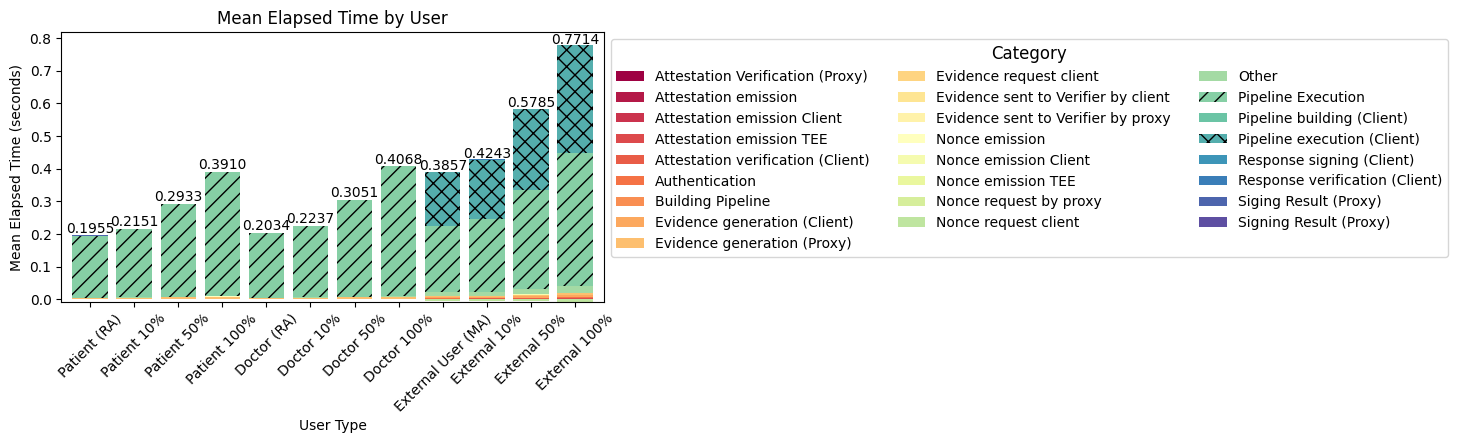

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

naive_file = '/home/ben/TM/src/tests/results_naive.csv'
simple_file = '/home/ben/TM/src/tests/simple_data_access/results.csv'
simple_subtimes_file = '/home/ben/TM/src/tests/simple_data_access/results_subtimes.csv'
extended_file = '/home/ben/TM/src/tests/extended_data_access_test/results.csv'
extended_subtimes_file = '/home/ben/TM/src/tests/extended_data_access_test/results_subtime.csv'

header = ["Timestamp", "User ID", "Client Result", "Elapsed Time (seconds)"]

naive_df = pd.read_csv(naive_file, names=header, header=None)
simple_df = pd.read_csv(simple_file)
simple_subtimes_df = pd.read_csv(simple_subtimes_file)
extended_df = pd.read_csv(extended_file)
extended_subtimes_df = pd.read_csv(extended_subtimes_file)

user_labels = {
    "000000000000000000000000": "Doctor",
    "111111111111111111111111": "Patient",
    "222222222222222222222222": "External User",
    "patient1": "Patient",
    "doctor1": "Doctor",
    "external1": "External User"
}

def append_user_label(df, user_labels, label_suffix):
    df['User Label'] = df['User ID'].map(lambda user_id: user_labels.get(user_id, "Unknown") + label_suffix)

append_user_label(naive_df, user_labels, "")
append_user_label(simple_df, user_labels, " (RA)")
append_user_label(simple_subtimes_df, user_labels, " (RA)")
append_user_label(extended_df, user_labels, " (MA)")
append_user_label(extended_subtimes_df, user_labels, " (MA)")

combined_df = pd.concat([naive_df, simple_df, extended_df])
mean_elapsed_time = combined_df.groupby('User Label')['Elapsed Time (seconds)'].mean()

combined_subtimes_df = pd.concat([simple_subtimes_df, extended_subtimes_df])
mean_elapsed_time_subtimes = combined_subtimes_df.groupby(['User Label', 'Category'])['Elapsed Time (seconds)'].mean()

naive_df['Category'] = 'Overall'
naive_mean_elapsed_time = naive_df.groupby(['User Label', 'Category'])['Elapsed Time (seconds)'].mean()
grouped_means = pd.concat([naive_mean_elapsed_time, mean_elapsed_time_subtimes])


mean_elapsed_time_subtimes_df = mean_elapsed_time_subtimes.unstack(fill_value=0)

# Add the 'Other' category to handle the remaining time
mean_elapsed_time_subtimes_df['Other'] = mean_elapsed_time - mean_elapsed_time_subtimes_df.sum(axis=1)

# Now, mean_elapsed_time_subtimes_df has 'User Label' as index and categories as columns
mean_elapsed_time_subtimes = mean_elapsed_time_subtimes_df.stack()

# Increase the values by 10%, 50%, and 100%
mean_elapsed_time_subtimes_10 = mean_elapsed_time_subtimes * 1.10
mean_elapsed_time_subtimes_50 = mean_elapsed_time_subtimes * 1.50
mean_elapsed_time_subtimes_100 = mean_elapsed_time_subtimes * 2.00

# Rename the User with the postfix "10%", "50%", and "100%"
mean_elapsed_time_subtimes_10.index = mean_elapsed_time_subtimes_10.index.map(lambda x: (x[0].split()[0] + " 10%", x[1]))
mean_elapsed_time_subtimes_50.index = mean_elapsed_time_subtimes_50.index.map(lambda x: (x[0].split()[0] + " 50%", x[1]))
mean_elapsed_time_subtimes_100.index = mean_elapsed_time_subtimes_100.index.map(lambda x: (x[0].split()[0] + " 100%", x[1]))


# Now, using `grouped_means`, make sure you have one row for each user label and one column per category
grouped_means = pd.concat([mean_elapsed_time_subtimes, mean_elapsed_time_subtimes_10, mean_elapsed_time_subtimes_50, mean_elapsed_time_subtimes_100])

# Reorganize the dataframe to match 'User Label' as index and categories as columns
grouped_means_df = grouped_means.unstack(fill_value=0)
print(grouped_means_df)
ordered_labels = ['Patient (RA)', 'Patient 10%', 'Patient 50%', 'Patient 100%', 'Doctor (RA)', 'Doctor 10%', 'Doctor 50%', 'Doctor 100%', 'External User (MA)', 'External 10%', 'External 50%', 'External 100%']
# Reorder the grouped_means_df to match the desired order of labels
grouped_means_df = grouped_means_df.loc[ordered_labels]

# Now, plot the stacked bar graph
plt.rcParams["figure.autolayout"] = True
plt.figure(figsize=(10, 6))

# Plotting the stacked bar graph
bars = grouped_means_df.plot(kind='bar', stacked=True, width=0.8, colormap='Spectral')

for container, label in zip(bars.containers, grouped_means_df.columns):
    if label in hatch_patterns:
        for patch in container:
            patch.set_hatch(hatch_patterns[label])


# Adding labels to each bar
for index, value in enumerate(grouped_means_df.sum(axis=1)):
    plt.text(index, value, f'{value:.3f}', ha='center', va='bottom')
    
# Customizing the plot
plt.title('Mean Elapsed Time by User')
plt.ylabel('Mean Elapsed Time (seconds)')
plt.xlabel('User Type')
plt.xticks(rotation=45)

# Adjust the legend to fit the plot better
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), title='Category', ncol=3, fontsize='medium', title_fontsize='large')
# Display the plot
plt.show()


